# Nonlinear Regression

Examples from Chapter 38 of <i>Scientific Computation for Hackers: Python and the Jupyter Shell</i>

GPL license. 

In [1]:
USPOP=[3929, 5308,7239,9638,12866,17069,23191,31433,
  38558,50189,62979,76212,92228,106021,123202,
  132164, 151325,179323,203302,226542,248709]
USYR =[1790,1800,1810,1820,1830,1840,1850,1860,1870,1880,
  1890,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990]

In [3]:
import numpy as np
xvals=[X-1790 for X in USYR]
logpop=np.log(USPOP)
m,b=np.polyfit(xvals,logpop,1)
m,b

(0.02076894499686318, 8.671758205934369)

In [4]:
def predicted(x):
    return np.exp(m*x+b)

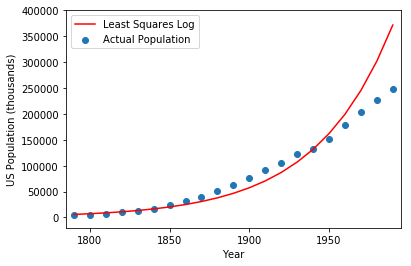

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(xvals, USPOP, label="Actual Population")
pdata=[predicted(x) for x in xvals]
plt.plot(xvals,pdata, c="red", label="Least Squares Log")
plt.xlabel("Year")
plt.ylabel("US Population (thousands)")
plt.xticks(range(10,201,50), range(1800,1991,50))
plt.xlim(-5,205)
plt.ylim(-20000,400000)
plt.legend(loc="best")

In [7]:
def rmspop(m, b):
    def pred(x,m,b):
        return np.exp(m*x+b)
    preds=[pred(x,m,b) for x in xvals]
    rss = sum([(y1-y2)**2 for y1,y2 in zip(preds, USPOP)])
    return np.sqrt(rss)

Text(0,0.5,'b')

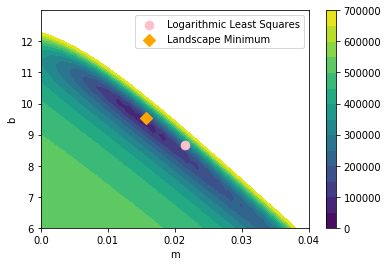

In [17]:
A=[[rmspop(M,B) for M in np.linspace(0.0,.04,25)] 
   for B in np.linspace(1,15,200)]
cp=plt.contourf(A, levels=np.linspace(0,700000,15))

plt.colorbar(cp)
plt.scatter([xpoint],[ypoint], label="Logarithmic Least Squares", 
       s=75, facecolor="pink")
plt.scatter([PLUSXpoint],[PLUSYpoint],marker="D", s=75,
        facecolor="orange", label="Landscape Minimum")
plt.xticks(range(0, 25, 6), np.linspace(0.0, 0.04,5))

plt.yticks([(199./14.)*(x-1) for x in range(6,13)], range(6,13))
plt.ylim((199./14.)*5., (199./14.)*12)
plt.legend(loc="upper right")
plt.xlabel("m");plt.ylabel("b")


In [18]:
rmspop(.0207, 8.617), rmspop(0.015, 9.5)

(128915.98119364001, 44022.051609003756)

In [19]:
boys=np.random.normal(149.0488164,3.7468166,800)
girls=np.random.normal(151.1913253,3.7468166,700)

In [21]:
b=[[x,0] for x in boys]
g=[[x,1] for x in girls]
bg = np.array(b+g)
heights=bg[:,0]
zerosones=bg[:,1]


In [22]:
def bindata(xdata, zerosones, m, M, nbins):
    Delta=float(M-m); N = nbins+1
    binmins=np.linspace(m,M,N)
    zeros, ones = N*[0], N*[0]    
    binvals=[int(nbins*(x-m)/Delta) for x in xdata]  
    for flag,b in zip(zerosones,binvals):
        if flag>0:
            ones[b]+=1  # histogram of ones
        else:
            zeros[b]+=1 # histogram of zeros      
    sizes = [x+y for x,y in zip(ones, zeros)] # total histogram
    proportions=[float(x)/float(y) if y>0 else 0 for x,y \
                 in zip(ones, sizes) ]    
    return (binmins, proportions, sizes)

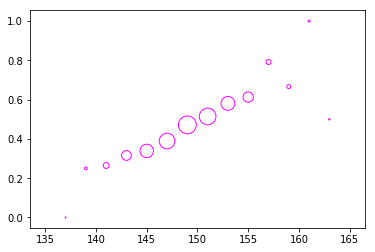

In [25]:
xv, yv, sv = bindata(heights, zerosones,135, 165, 15 )
plt.scatter(xv, yv, s=sv, c="white", edgecolor="magenta")

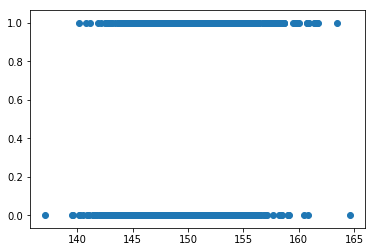

In [27]:
plt.scatter(heights,zerosones)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
m=min(heights)
y=np.array(zerosones)
X=np.array([[x-m] for x in heights])

/usr/lib/python3/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [33]:
x_train,x_test,y_train,y_test = train_test_split(X, y,test_size=0.25)

In [34]:
LR=LogisticRegression()
LR.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [35]:
R2=LR.score(x_test,y_test)
a=LR.coef_[0][0]
b=LR.intercept_[0]
print("Rˆ2=",R2,"a=",a,"b=",b)

Rˆ2= 0.6186666666666667 a= 0.10770882494386627 b= -1.4955330285090422


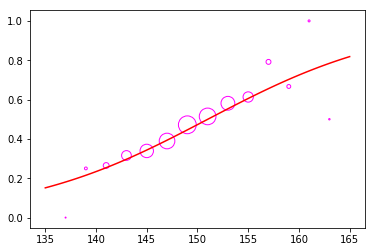

In [37]:
from math import e
def f(x):
    return 1.0/(1.0+e**(-a*x-b))
xvals = np.linspace(135,165,100)
yvals = [f(x-m) for x in xvals]
plt.plot(xvals,yvals, c="red")
plt.scatter(xv, yv, s=sv, c="white", edgecolor="magenta")

In [39]:
from sklearn import metrics
predictions=LR.predict(x_test)
print(metrics.classification_report(y_test,predictions))

             precision    recall  f1-score   support

        0.0       0.65      0.71      0.68       213
        1.0       0.57      0.50      0.53       162

avg / total       0.61      0.62      0.61       375



In [40]:
confusion_matrix = metrics.confusion_matrix(y_test,predictions)
print(confusion_matrix)

[[151  62]
 [ 81  81]]


Text(0.5,0,'Predicted Label')

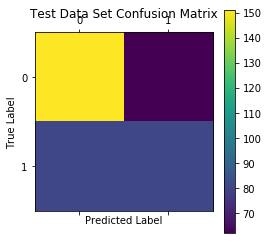

In [41]:
plt.matshow(confusion_matrix)
plt.title("Test Data Set Confusion Matrix")
plt.colorbar(); plt.ylabel("True Label"); plt.xlabel("Predicted Label")